In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

---
#### Clean 2020_Table14.csv

In [2]:
df = pd.read_csv("./datasets_original/2020_Table14.csv", skipfooter=11)
df = df.drop(columns=["Textbox88", "Textbox84", "Textbox17"])
df = df.rename(columns={"Textbox41":"Model", "Textbox37":"Gross", "Code":"Net",
                        "Station":"Operator", "Textbox70":"Provider",
                        "Station1":"Name", "Textbox90":"EAF", "Textbox86":"UCF"})

# Rename in a second instance to avoid confusions with 'Code1'
df = df.rename(columns={'Code1':'Code'})

/tmp/ipykernel_151773/1152066658.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  df = pd.read_csv("./datasets_original/2020_Table14.csv", skipfooter=11)


In [3]:
df.tail(10)

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,Textbox74,Textbox94,Textbox78,EAF,UCF
428,USA,US -457,BRAIDWOOD-2,PWR,WH 4LP (DRYAMB,3645,1230,1160,EXELON,WH,1975-8,1988-5,1988-10,92.4,92.4
429,USA,US -458,RIVER BEND-1,BWR,BWR-6 (Mark 3),3091,1016,967,ENTERGY,GE,1977-3,1985-12,1986-6,84.8,84.9
430,USA,US -461,CLINTON-1,BWR,BWR-6 (Mark 3),3473,1098,1062,EXELON,GE,1975-10,1987-4,1987-11,82.2,82.2
431,USA,US -482,WOLF CREEK,PWR,WH 4LP (DRYAMB,3565,1285,1200,WCNOC,WH,1977-5,1985-6,1985-9,85.9,85.9
432,USA,US -483,CALLAWAY-1,PWR,WH 4LP (DRYAMB,3565,1275,1215,AmerenUE,WH,1975-9,1984-10,1984-12,88.4,88.4
433,USA,US -498,SOUTH TEXAS-1,PWR,WH 4LP (DRYAMB,3853,1354,1280,STP,WH,1975-12,1988-3,1988-8,84.4,84.4
434,USA,US -499,SOUTH TEXAS-2,PWR,WH 4LP (DRYAMB,3853,1354,1280,STP,WH,1975-12,1989-4,1989-6,84.3,84.3
435,USA,US -528,PALO VERDE-1,PWR,CE80 2LP (DRYA,3990,1414,1311,APS,CE,1976-5,1985-6,1986-1,82.2,82.3
436,USA,US -529,PALO VERDE-2,PWR,CE80 2LP (DRYA,3990,1414,1314,APS,CE,1976-6,1986-5,1986-9,84.5,84.5
437,USA,US -530,PALO VERDE-3,PWR,CE80 2LP (DRYA,3990,1414,1312,APS,CE,1976-6,1987-11,1988-1,86.3,86.5


Set the dates with a little parsing.
The Operation field has NaNs, so it needs a little more care.

In [4]:
df['Start_year'] = df["Textbox74"].str.split('-', expand=True)[0].astype(int)
## Trick to clean up leading zeros
df['Start_month'] = df["Textbox74"].str.split('-', expand=True)[1].astype(int).astype(str).str.zfill(2).astype(str)
df['Start'] = pd.to_datetime(df['Start_year'].astype(str) + '-' + df['Start_month'].str[-2:] + '-01')

In [5]:
df['Connection_year'] = df["Textbox94"].str.split('-', expand=True)[0]
## Trick to clean up leading zeros
df['Connection_month'] = df["Textbox94"].str.split('-', expand=True)[1].astype(int).astype(str).str.zfill(2).astype(str)
df['Connection'] = pd.to_datetime(df['Connection_year'] + '-' + df['Connection_month'].str[-2:] + '-01')

In [6]:
connected = ~df['Textbox78'].isna()

In [7]:
df['Operation_year'] = np.nan
df['Operation_month'] = np.nan
df['Operation'] = np.nan

In [8]:
df.loc[connected, 'Operation_year'] = df.loc[connected, "Textbox78"].str.split('-', expand=True)[0]
## Trick to clean up leading zeros
df.loc[connected, 'Operation_month'] = df.loc[connected, "Textbox78"].str.split('-', expand=True)[1].astype(int).astype(str).str.zfill(2).astype(str)
df.loc[connected, 'Operation'] = pd.to_datetime(df.loc[connected, 'Operation_year'] + '-' + df.loc[connected, 'Operation_month'].str[-2:] + '-01')

In [9]:
df.drop(columns=['Operation_year', 'Operation_month',
                 'Connection_year', 'Connection_month',
                 'Start_year', 'Start_month', 'Textbox74', 'Textbox94', 'Textbox78'], inplace=True)

In [10]:
df.head()

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,EAF,UCF,Start,Connection,Operation
0,ARGENTINA,AR -1,ATUCHA-1,PHWR,PHWR KWU,1179,362,340,NASA,SIEMENS,74.5,75.5,1968-06-01,1974-03-01,1974-06-01 00:00:00
1,ARGENTINA,AR -2,EMBALSE,PHWR,CANDU 6,2064,656,608,NASA,AECL,78.6,78.9,1974-04-01,1983-04-01,1984-01-01 00:00:00
2,ARGENTINA,AR -3,ATUCHA-2,PHWR,PHWR KWU,2160,745,693,NASA,SIEMENS,53.1,53.1,1981-07-01,2014-06-01,2016-05-01 00:00:00
3,ARMENIA,AM -19,ARMENIAN-2,PWR,VVER V-270,1375,451,415,ANPPCJSC,FAEA,65.6,67.7,1975-07-01,1980-01-01,1980-05-01 00:00:00
4,BELARUS,BY -1,BELARUSIAN-1,PWR,VVER V-491,3200,1194,1110,BelNPP,JSC ASE,0.0,0.0,2013-11-01,2020-11-01,NaN


### Concat with last 4 powerplants from Taiwan

In [30]:
dt = pd.read_csv("./datasets_original/2020_Table14.csv", skipfooter=3, skiprows=442)
dt.head(20)

/tmp/ipykernel_151773/3435309017.py:1: ParserWarning: Falling back to the 'python' engine because the 'c' engine does not support skipfooter; you can avoid this warning by specifying engine='python'.
  dt = pd.read_csv("./datasets_original/2020_Table14.csv", skipfooter=3, skiprows=442)


,Country2,Code2,Station2,Type2,Textbox43,ThermalPower2,Textbox39,Code3,Station3,Textbox71,Textbox75,Textbox95,Textbox79,Textbox91,Textbox87,Textbox22
0,"TAIWAN,CHINA",TW -3,KUOSHENG-1,BWR,BWR-6,2894,985,985,TPC,GE,1975-11,1981-5,1981-12,83.9,84.7,-
1,"TAIWAN,CHINA",TW -4,KUOSHENG-2,BWR,BWR-6,2894,985,985,TPC,GE,1976-3,1982-6,1983-3,83.3,84.3,-
2,"TAIWAN,CHINA",TW -5,MAANSHAN-1,PWR,WH 3LP (WE 312,2822,951,936,TPC,WH,1978-8,1984-5,1984-7,86.7,87.7,-
3,"TAIWAN,CHINA",TW -6,MAANSHAN-2,PWR,WH 3LP (WE 312,2822,951,938,TPC,WH,1979-2,1985-2,1985-5,86.2,87.4,-


In [31]:
dt = dt.rename(columns={'Country2':'Country', 'Code2':'Code', 'Station2':'Name', 'Type2':'Type',
                   'Textbox43':'Model', 'ThermalPower2':'ThermalPower', 'Textbox39':'Gross',
                   'Code3':'Net', 'Station3':'Operator','Textbox71':'Provider',
                   'Textbox91':'EAF', 'Textbox87':'UCF'})
dt.drop(columns=['Textbox22'], inplace=True)

In [32]:
dt.head()

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,Textbox75,Textbox95,Textbox79,EAF,UCF
0,"TAIWAN,CHINA",TW -3,KUOSHENG-1,BWR,BWR-6,2894,985,985,TPC,GE,1975-11,1981-5,1981-12,83.9,84.7
1,"TAIWAN,CHINA",TW -4,KUOSHENG-2,BWR,BWR-6,2894,985,985,TPC,GE,1976-3,1982-6,1983-3,83.3,84.3
2,"TAIWAN,CHINA",TW -5,MAANSHAN-1,PWR,WH 3LP (WE 312,2822,951,936,TPC,WH,1978-8,1984-5,1984-7,86.7,87.7
3,"TAIWAN,CHINA",TW -6,MAANSHAN-2,PWR,WH 3LP (WE 312,2822,951,938,TPC,WH,1979-2,1985-2,1985-5,86.2,87.4


In [33]:
dt['Start_year'] = dt["Textbox75"].str.split('-', expand=True)[0].astype(int)
## Trick to clean up leading zeros
dt['Start_month'] = dt["Textbox75"].str.split('-', expand=True)[1].astype(int).astype(str).str.zfill(2).astype(str)
dt['Start'] = pd.to_datetime(dt['Start_year'].astype(str) + '-' + dt['Start_month'].str[-2:] + '-01')

In [34]:
dt['Connection_year'] = dt["Textbox95"].str.split('-', expand=True)[0]
## Trick to clean up leading zeros
dt['Connection_month'] = dt["Textbox95"].str.split('-', expand=True)[1].astype(int).astype(str).str.zfill(2).astype(str)
dt['Connection'] = pd.to_datetime(dt['Connection_year'] + '-' + dt['Connection_month'].str[-2:] + '-01')

In [35]:
dt['Operation_year'] = dt["Textbox95"].str.split('-', expand=True)[0]
## Trick to clean up leading zeros
dt['Operation_month'] = dt["Textbox95"].str.split('-', expand=True)[1].astype(int).astype(str).str.zfill(2).astype(str)
dt['Operation'] = pd.to_datetime(dt['Operation_year'] + '-' + dt['Operation_month'].str[-2:] + '-01')

In [36]:
dt.drop(columns=['Operation_year', 'Operation_month',
                 'Connection_year', 'Connection_month',
                 'Start_year', 'Start_month', 'Textbox75', 'Textbox95', 'Textbox79'], inplace=True)

In [37]:
dt

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,EAF,UCF,Start,Connection,Operation
0,"TAIWAN,CHINA",TW -3,KUOSHENG-1,BWR,BWR-6,2894,985,985,TPC,GE,83.9,84.7,1975-11-01,1981-05-01,1981-05-01
1,"TAIWAN,CHINA",TW -4,KUOSHENG-2,BWR,BWR-6,2894,985,985,TPC,GE,83.3,84.3,1976-03-01,1982-06-01,1982-06-01
2,"TAIWAN,CHINA",TW -5,MAANSHAN-1,PWR,WH 3LP (WE 312,2822,951,936,TPC,WH,86.7,87.7,1978-08-01,1984-05-01,1984-05-01
3,"TAIWAN,CHINA",TW -6,MAANSHAN-2,PWR,WH 3LP (WE 312,2822,951,938,TPC,WH,86.2,87.4,1979-02-01,1985-02-01,1985-02-01


In [38]:
df.columns == dt.columns

array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True])

In [42]:
dr = pd.concat([df,dt], ignore_index=True)

In [43]:
dr.head()

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,EAF,UCF,Start,Connection,Operation
0,ARGENTINA,AR -1,ATUCHA-1,PHWR,PHWR KWU,1179,362,340,NASA,SIEMENS,74.5,75.5,1968-06-01,1974-03-01,1974-06-01 00:00:00
1,ARGENTINA,AR -2,EMBALSE,PHWR,CANDU 6,2064,656,608,NASA,AECL,78.6,78.9,1974-04-01,1983-04-01,1984-01-01 00:00:00
2,ARGENTINA,AR -3,ATUCHA-2,PHWR,PHWR KWU,2160,745,693,NASA,SIEMENS,53.1,53.1,1981-07-01,2014-06-01,2016-05-01 00:00:00
3,ARMENIA,AM -19,ARMENIAN-2,PWR,VVER V-270,1375,451,415,ANPPCJSC,FAEA,65.6,67.7,1975-07-01,1980-01-01,1980-05-01 00:00:00
4,BELARUS,BY -1,BELARUSIAN-1,PWR,VVER V-491,3200,1194,1110,BelNPP,JSC ASE,0.0,0.0,2013-11-01,2020-11-01,NaN


In [44]:
dr.tail()

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,EAF,UCF,Start,Connection,Operation
437,USA,US -530,PALO VERDE-3,PWR,CE80 2LP (DRYA,3990,1414,1312,APS,CE,86.3,86.5,1976-06-01,1987-11-01,1988-01-01 00:00:00
438,"TAIWAN,CHINA",TW -3,KUOSHENG-1,BWR,BWR-6,2894,985,985,TPC,GE,83.9,84.7,1975-11-01,1981-05-01,1981-05-01 00:00:00
439,"TAIWAN,CHINA",TW -4,KUOSHENG-2,BWR,BWR-6,2894,985,985,TPC,GE,83.3,84.3,1976-03-01,1982-06-01,1982-06-01 00:00:00
440,"TAIWAN,CHINA",TW -5,MAANSHAN-1,PWR,WH 3LP (WE 312,2822,951,936,TPC,WH,86.7,87.7,1978-08-01,1984-05-01,1984-05-01 00:00:00
441,"TAIWAN,CHINA",TW -6,MAANSHAN-2,PWR,WH 3LP (WE 312,2822,951,938,TPC,WH,86.2,87.4,1979-02-01,1985-02-01,1985-02-01 00:00:00


In [51]:
dr['Construction_time'] = (dr['Connection'] - dr['Start']).dt.days

In [52]:
dr

,Country,Code,Name,Type,Model,ThermalPower,Gross,Net,Operator,Provider,EAF,UCF,Start,Connection,Operation,Construction_time
0,ARGENTINA,AR -1,ATUCHA-1,PHWR,PHWR KWU,1179,362,340,NASA,SIEMENS,74.5,75.5,1968-06-01,1974-03-01,1974-06-01 00:00:00,2099
1,ARGENTINA,AR -2,EMBALSE,PHWR,CANDU 6,2064,656,608,NASA,AECL,78.6,78.9,1974-04-01,1983-04-01,1984-01-01 00:00:00,3287
2,ARGENTINA,AR -3,ATUCHA-2,PHWR,PHWR KWU,2160,745,693,NASA,SIEMENS,53.1,53.1,1981-07-01,2014-06-01,2016-05-01 00:00:00,12023
3,ARMENIA,AM -19,ARMENIAN-2,PWR,VVER V-270,1375,451,415,ANPPCJSC,FAEA,65.6,67.7,1975-07-01,1980-01-01,1980-05-01 00:00:00,1645
4,BELARUS,BY -1,BELARUSIAN-1,PWR,VVER V-491,3200,1194,1110,BelNPP,JSC ASE,0.0,0.0,2013-11-01,2020-11-01,NaN,2557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
437,USA,US -530,PALO VERDE-3,PWR,CE80 2LP (DRYA,3990,1414,1312,APS,CE,86.3,86.5,1976-06-01,1987-11-01,1988-01-01 00:00:00,4170
438,"TAIWAN,CHINA",TW -3,KUOSHENG-1,BWR,BWR-6,2894,985,985,TPC,GE,83.9,84.7,1975-11-01,1981-05-01,1981-05-01 00:00:00,2008
439,"TAIWAN,CHINA",TW -4,KUOSHENG-2,BWR,BWR-6,2894,985,985,TPC,GE,83.3,84.3,1976-03-01,1982-06-01,1982-06-01 00:00:00,2283
440,"TAIWAN,CHINA",TW -5,MAANSHAN-1,PWR,WH 3LP (WE 312,2822,951,936,TPC,WH,86.7,87.7,1978-08-01,1984-05-01,1984-05-01 00:00:00,2100


In [55]:
dr.to_csv('./datasets_clean/2020Table14_clean.csv', index=False)

---
### Linear fits

In [45]:
coef = np.polyfit(dr['Net'].values, dr['Construction_time'].values, 1)
xnet_all = np.linspace(0, 1700)
netfit_all = xnet * coef[0] + coef[1]

KeyError: 'Construction_time'

In [90]:
yearsthres = 15
coef_t = np.polyfit(df['Net'][df['Construction_time']<yearsthres].values, df['Construction_time'][df['Construction_time']<yearsthres].values, 1)
xnet = np.linspace(0, 1700)
netfit_t = xnet * coef_t[0] + coef_t[1]

In [91]:
coef_t

array([4.23133204e-04, 6.59545939e+00])

In [92]:
coef

array([7.30809101e-04, 7.06861797e+00])

In [73]:
sns.set_palette("viridis_r")

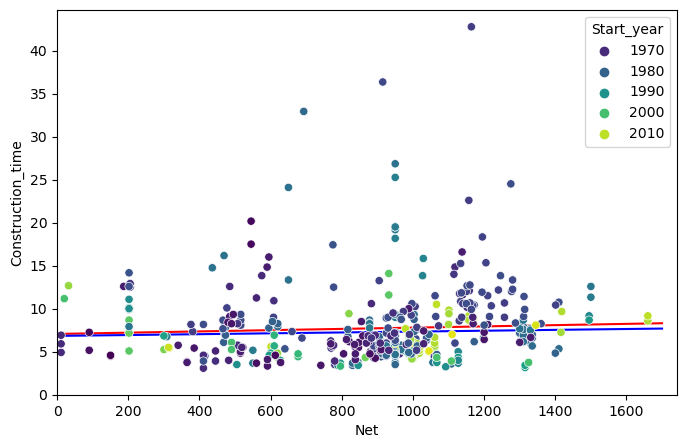

In [89]:
fig, ax = plt.subplots(figsize=(8,5))
sns.scatterplot(x='Net', y='Construction_time', data=df, hue='Start_year', palette='viridis', ax=ax)
ax.set_xlim(left=0)
ax.set_ylim(bottom=0)

ax.plot(xnet_all, netfit_all, color='r', zorder=-1)
ax.plot(xnet_all, netfit_t, color='b', zorder=-1)

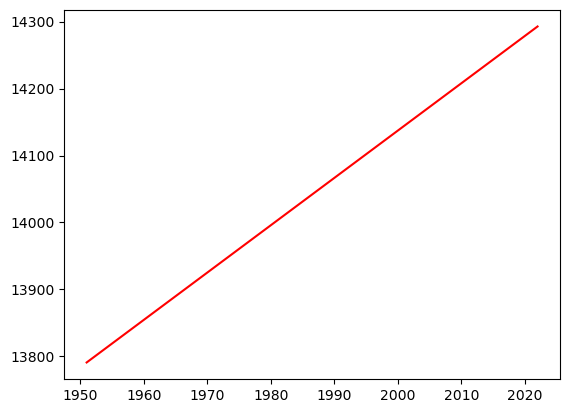

In [67]:
plt.plot(xnet, netfit, color='r', zorder=-1)